# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# Pre-processing

In [8]:
data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [9]:
data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             48660 non-null int64
department              48660 non-null object
region                  48660 non-null object
education               48660 non-null object
gender                  48660 non-null object
recruitment_channel     48660 non-null object
no_of_trainings         48660 non-null int64
age                     48660 non-null int64
previous_year_rating    48660 non-null float64
length_of_service       48660 non-null int64
KPIs_met >80%           48660 non-null int64
awards_won?             48660 non-null int64
avg_training_score      48660 non-null int64
is_promoted             48660 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [13]:
data['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [14]:
data['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_32', 'region_6', 'region_33', 'region_8',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [15]:
data['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [16]:
data['gender'].unique()

array(['f', 'm'], dtype=object)

In [17]:
data['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

# Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
Le=LabelEncoder()

In [20]:
data['department']=Le.fit_transform(data['department'])

In [21]:
data['region']=Le.fit_transform(data['region'])

In [22]:
data['education']=Le.fit_transform(data['education'])

In [23]:
data['gender']=Le.fit_transform(data['gender'])

In [24]:
data['recruitment_channel']=Le.fit_transform(data['recruitment_channel'])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             48660 non-null int64
department              48660 non-null int32
region                  48660 non-null int32
education               48660 non-null int32
gender                  48660 non-null int32
recruitment_channel     48660 non-null int32
no_of_trainings         48660 non-null int64
age                     48660 non-null int64
previous_year_rating    48660 non-null float64
length_of_service       48660 non-null int64
KPIs_met >80%           48660 non-null int64
awards_won?             48660 non-null int64
avg_training_score      48660 non-null int64
is_promoted             48660 non-null int64
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.6 MB


In [26]:
# Seperating dependent and independent variables
X=data.drop(columns=['is_promoted'])
Y=data.is_promoted

In [27]:
X.shape

(48660, 13)

In [28]:
# Data splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((38928, 13), (9732, 13), (38928,), (9732,))

# Knn

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score,auc

In [30]:
knn=KNeighborsClassifier()

In [31]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [32]:
Y_train_pred=knn.predict(X_train)
Y_test_pred=knn.predict(X_test)
Y_train_pred_prob=knn.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=knn.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [33]:
print('-----------------Train--------------------------Test---------------')
print('Accuracy  score : {}              {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}              {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}              {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}              {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train--------------------------Test---------------
Accuracy  score : 0.9156648170982327              0.9061857788738183
Precision score : 0.6679245283018868              0.136986301369863
Recall Score    : 0.05249110320284697              0.011627906976744186
ROC_Auc_score   : 0.5250080670699802              0.5022634575460818


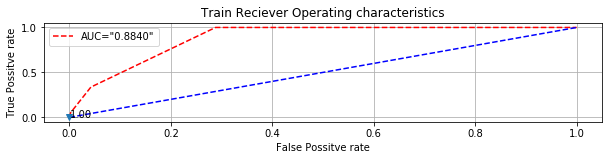

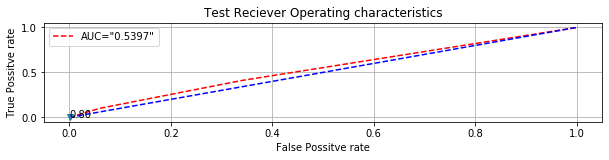

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()


# SVM

In [35]:
from sklearn.svm import SVC

In [36]:
svc=SVC(probability=True)

In [37]:
svc.fit(X_train,Y_train)

SVC(probability=True)

In [38]:
Y_train_pred=svc.predict(X_train)
Y_test_pred=svc.predict(X_test)
Y_train_pred_prob=svc.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=svc.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [39]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 0.9133785450061652                         0.9116317303740238
Precision score : 0.0                         0.0
Recall Score    : 0.0                         0.0
ROC_Auc_score   : 0.5                         0.5


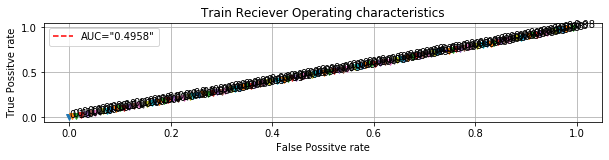

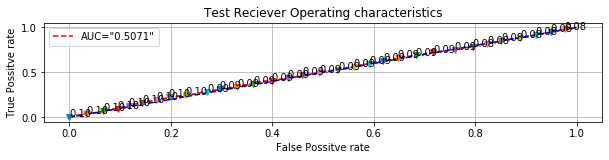

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()


# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [42]:
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
Y_train_pred=RFC.predict(X_train)
Y_test_pred=RFC.predict(X_test)
Y_train_pred_prob=RFC.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=RFC.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [44]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 1.0                         0.9301274147143445
Precision score : 1.0                         0.9090909090909091
Recall Score    : 1.0                         0.23255813953488372
ROC_Auc_score   : 1.0                         0.6151519281984608


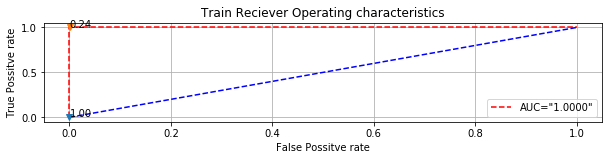

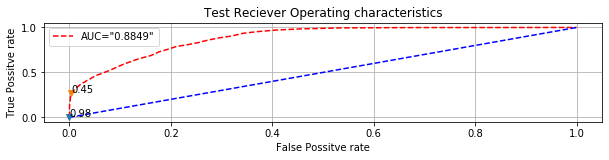

In [45]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

# Gradient Boosting

In [47]:
from xgboost import XGBClassifier

In [48]:
XGB=XGBClassifier()

In [49]:
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
Y_train_pred=XGB.predict(X_train)
Y_test_pred=XGB.predict(X_test)
Y_train_pred_prob=XGB.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=XGB.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [51]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 0.9538121660501439                         0.9388614878750514
Precision score : 0.9852034525277436                         0.8885630498533724
Recall Score    : 0.4739027283511269                         0.35232558139534886
ROC_Auc_score   : 0.7366138683942607                         0.6740212217166103


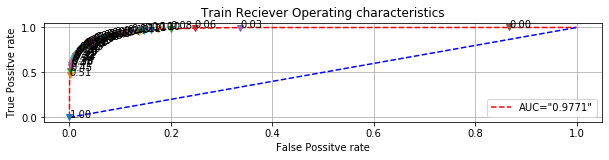

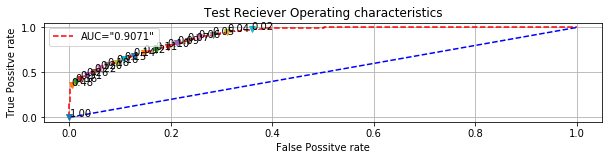

In [52]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

In [53]:
Y.value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

- From the above we can say that the data is imbalanced

# Balancing the dataset using SMOTE

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
sm=SMOTE()

In [56]:
X,Y=sm.fit_resample(X,Y)

In [57]:
Y.value_counts()

1    44428
0    44428
Name: is_promoted, dtype: int64

In [58]:
# Splitting the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((71084, 13), (17772, 13), (71084,), (17772,))

# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score,auc

In [60]:
knn=KNeighborsClassifier()

In [61]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [62]:
Y_train_pred=knn.predict(X_train)
Y_test_pred=knn.predict(X_test)
Y_train_pred_prob=knn.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=knn.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [63]:
print('-----------------Train--------------------------Test---------------')
print('Accuracy  score : {}                          {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}             {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}             {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train--------------------------Test---------------
Accuracy  score : 0.8552135501660008                          0.7951271663290569
Precision score : 0.7899024670109007                         0.7292652989654568
Recall Score    : 0.9680231740585539             0.9376620448652914
ROC_Auc_score   : 0.8551659203532277             0.7953673666636311


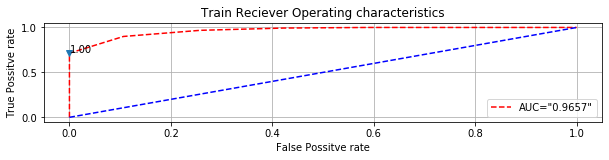

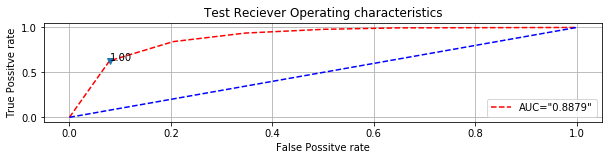

In [64]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()


# SVM


# Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [66]:
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [67]:
Y_train_pred=RFC.predict(X_train)
Y_test_pred=RFC.predict(X_test)
Y_train_pred_prob=RFC.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=RFC.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [68]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 1.0                         0.9460949808687824
Precision score : 1.0                         0.9650875749382861
Recall Score    : 1.0                         0.9254875436816593
ROC_Auc_score   : 1.0                         0.9460602531350661


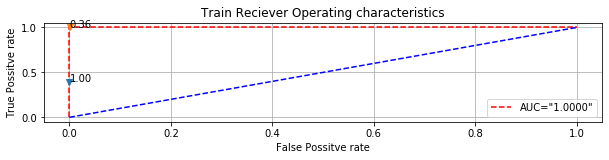

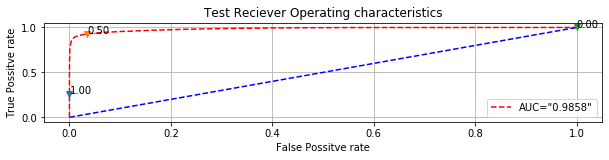

In [69]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

# Gradient Boosting

In [70]:
from xgboost import XGBClassifier

In [71]:
XGB=XGBClassifier()

In [72]:
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
Y_train_pred=XGB.predict(X_train)
Y_test_pred=XGB.predict(X_test)
Y_train_pred_prob=XGB.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=XGB.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [74]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 0.9563333520904845                         0.9445194688273689
Precision score : 0.9883528455773919                         0.9751717488248764
Recall Score    : 0.9235874792586551                         0.9120730470071018
ROC_Auc_score   : 0.9563471778594062                         0.9444647899904625


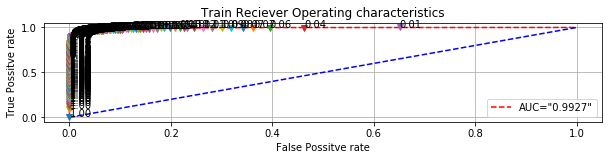

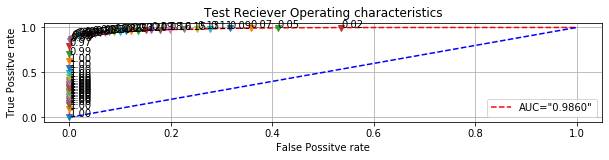

In [75]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

In [76]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier


In [77]:
BC=BaggingClassifier()

In [78]:
BC.fit(X_train,Y_train)

BaggingClassifier()

In [79]:
Y_train_pred=BC.predict(X_train)
Y_test_pred=BC.predict(X_test)
Y_train_pred_prob=BC.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=BC.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [80]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 0.9945557368746835                         0.9400180058519019
Precision score : 0.9992618249957413                         0.9623267385380879
Recall Score    : 0.9898472874539472                         0.9156803066170669
ROC_Auc_score   : 0.9945577248483742                         0.9399769918659989


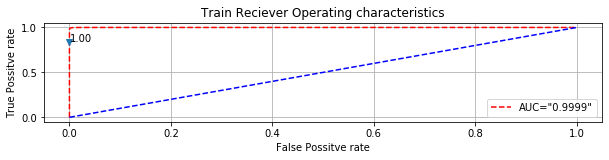

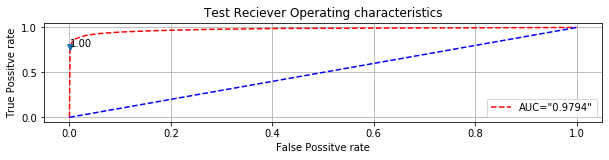

In [81]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

In [82]:
ABC=AdaBoostClassifier()

In [83]:
ABC.fit(X_train,Y_train)

AdaBoostClassifier()

In [84]:
Y_train_pred=ABC.predict(X_train)
Y_test_pred=ABC.predict(X_test)
Y_train_pred_prob=ABC.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=ABC.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [85]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 0.8835602948624163                         0.8814989871708305
Precision score : 0.9070669690820102                         0.9033027304161202
Recall Score    : 0.854796523891217                         0.8540187126592267
ROC_Auc_score   : 0.8835724393318218                         0.8814526773047846


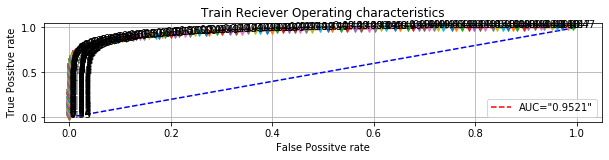

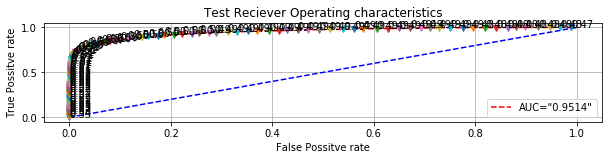

In [86]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

In [87]:
GBC=GradientBoostingClassifier()

In [88]:
GBC.fit(X_train,Y_train)

GradientBoostingClassifier()

In [89]:
Y_train_pred=GBC.predict(X_train)
Y_test_pred=GBC.predict(X_test)
Y_train_pred_prob=GBC.predict_proba(X_train)
Y_train_pred_prob1=Y_train_pred_prob[:,1]
Y_test_pred_prob=GBC.predict_proba(X_test)
Y_test_pred_prob1=Y_test_pred_prob[:,1]
fpr_train,tpr_train,thresholds_train=roc_curve(Y_train,Y_train_pred_prob1)
fpr_test,tpr_test,thresholds_test=roc_curve(Y_test,Y_test_pred_prob1)

In [90]:
print('-----------------Train-----------------------Test---------------')
print('Accuracy  score : {}                         {}'.format(accuracy_score(Y_train,Y_train_pred),accuracy_score(Y_test,Y_test_pred)))
print('Precision score : {}                         {}'.format(precision_score(Y_train,Y_train_pred),precision_score(Y_test,Y_test_pred)))
print('Recall Score    : {}                         {}'.format(recall_score(Y_train,Y_train_pred),recall_score(Y_test,Y_test_pred)))
print('ROC_Auc_score   : {}                         {}'.format(roc_auc_score(Y_train,Y_train_pred),roc_auc_score(Y_test,Y_test_pred)))

-----------------Train-----------------------Test---------------
Accuracy  score : 0.9123712790501378                         0.9129529597119064
Precision score : 0.9562254993466492                         0.9536669970267592
Recall Score    : 0.864386759287904                         0.8677713899222185
ROC_Auc_score   : 0.9123915387905166                         0.9128768195538516


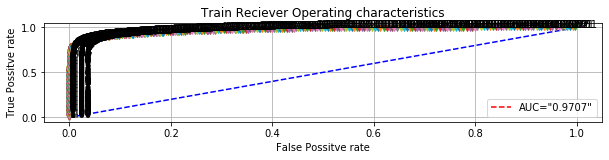

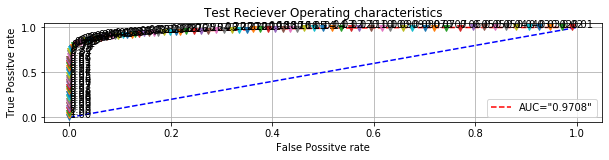

In [91]:
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(fpr_train,tpr_train,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_train)):
    if i%50==1:
        plt.plot(fpr_train[i],tpr_train[i],'v')
        plt.text(fpr_train[i],tpr_train[i],'%0.2f'%thresholds_train[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Train Reciever Operating characteristics')
area=auc(fpr_train,tpr_train)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()
print('\n')
plt.figure(figsize=(10,4))
plt.subplot(2,1,2)
plt.plot(fpr_test,tpr_test,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresholds_test)):
    if i%50==1:
        plt.plot(fpr_test[i],tpr_test[i],'v')
        plt.text(fpr_test[i],tpr_test[i],'%0.2f'%thresholds_test[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Test Reciever Operating characteristics')
area=auc(fpr_test,tpr_test)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

In [ ]:
#                        KNN		                     RFC	          	     XGB		           BC		                 ABC		      GB	
                    Train	    Test	   Train	Test	 Train	    Test	    Train	    Test	    Train	     Test	    Train	    Test
Accuracy  score :	0.854608632	0.797152825	1	0.931052199	0.953812166	0.938861488	0.990700781	0.931976983	0.922446568	0.919646527	0.936986231	0.933210029
Precision score :	0.789854739	0.73056042	1	0.898734177	0.985203453	0.88856305	0.999005305	0.767567568	0.731323722	0.716666667	0.94916911	0.930327869
Recall Score    :	0.966476362	0.940480216	1	0.247674419	0.473902728	0.352325581	0.893534994	0.330232558	0.165480427	0.15	0.287959668	0.263953488
ROC_Auc_score   :	0.8545614	0.797394361	1	0.622484639	0.736613868	0.674021222	0.94672531	0.66026957	0.579857437	0.572125789	0.643248593	0.631018674


# conclusion
- From the Test results Gradient Boosting classifier is performing better.

In [93]:
data_test=pd.read_csv('test.csv')

In [94]:
data_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [95]:
data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [97]:
data_test.dropna(inplace=True)

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:

Le=LabelEncoder()

In [100]:
data_test['department']=Le.fit_transform(data_test['department'])
data_test['region']=Le.fit_transform(data_test['region'])
data_test['education']=Le.fit_transform(data_test['education'])
data_test['gender']=Le.fit_transform(data_test['gender'])
data_test['recruitment_channel']=Le.fit_transform(data_test['recruitment_channel'])

In [101]:
data_test_pred=GBC.predict(data_test)

In [103]:
data_test['promoted']=data_test_pred

In [104]:
data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,promoted
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51,0
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47,0
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65,0
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61,0
5,46232,5,31,0,1,2,1,36,3.0,2,0,0,68,0


In [105]:
data_test.to_csv('Final_test_pred.csv')